In [260]:
# Importing all necessary modules.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [261]:
drug_df = pd.read_csv('drug200.csv')
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [262]:
# Display summary statistics of the dataset.
print(f"Summary Statistics:\n{drug_df.describe()}")

# Check for missing values in the dataset.
print(f"\nAmount of null values:\n{drug_df.isnull().sum()}")

# Display data types of each column in the dataset.
print(f"\nData Types of Each Column:\n{drug_df.dtypes}")

Summary Statistics:
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000

Amount of null values:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Data Types of Each Column:
Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


In [263]:
# Check for any imbalances in the categorical data.
for column in drug_df[['Sex', 'BP', 'Cholesterol', 'Drug']]:
    print(f"\nProportions for column: {column}:")
    print(drug_df[column].value_counts(normalize=True))
# There seems to be imbalances with the drugs.
# We can create a model first and see how it looks like before adjusting.


Proportions for column: Sex:
Sex
M    0.52
F    0.48
Name: proportion, dtype: float64

Proportions for column: BP:
BP
HIGH      0.385
LOW       0.320
NORMAL    0.295
Name: proportion, dtype: float64

Proportions for column: Cholesterol:
Cholesterol
HIGH      0.515
NORMAL    0.485
Name: proportion, dtype: float64

Proportions for column: Drug:
Drug
drugY    0.455
drugX    0.270
drugA    0.115
drugC    0.080
drugB    0.080
Name: proportion, dtype: float64


In [264]:
# Check unique values in these columns. 
print("\nThe unique values in the 'BP' column are:\n", drug_df['BP'].unique())
print("\nThe unique values in the 'Cholesterol' column are:\n", drug_df['Cholesterol'].unique())


The unique values in the 'BP' column are:
 ['HIGH' 'LOW' 'NORMAL']

The unique values in the 'Cholesterol' column are:
 ['HIGH' 'NORMAL']


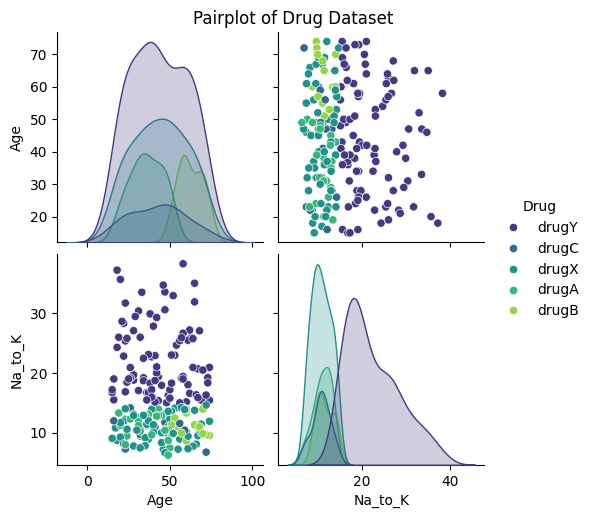

In [265]:
# Create a pairplot.
sns.pairplot(drug_df, hue='Drug', diag_kind='kde', palette='viridis')
plt.suptitle("Pairplot of Drug Dataset", y=1.02)
plt.show()

In [266]:
# We can label encode these features as the data is ordinal or binary.
drug_df["Sex"] = drug_df["Sex"].apply(lambda sample: 1 if sample == "M" else 0)
drug_df["BP"] = drug_df["BP"].apply(lambda sample: 2 if sample == "HIGH" else (1 if sample == "MEDIUM" else 0))
drug_df["Cholesterol"] = drug_df["Cholesterol"].apply(lambda sample: 1 if sample == "HIGH" else 0)

In [267]:
# One hot encode the drugs as this type of data is nominal.
drug_df = pd.concat([drug_df.drop("Drug", axis=1), pd.get_dummies(drug_df["Drug"]).astype(int)], axis=1)
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,drugA,drugB,drugC,drugX,drugY
0,23,0,2,1,25.355,0,0,0,0,1
1,47,1,0,1,13.093,0,0,1,0,0
2,47,1,0,1,10.114,0,0,1,0,0
3,28,0,0,1,7.798,0,0,0,1,0
4,61,0,0,1,18.043,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
195,56,0,0,1,11.567,0,0,1,0,0
196,16,1,0,1,12.006,0,0,1,0,0
197,52,1,0,1,9.894,0,0,0,1,0
198,23,1,0,0,14.020,0,0,0,1,0


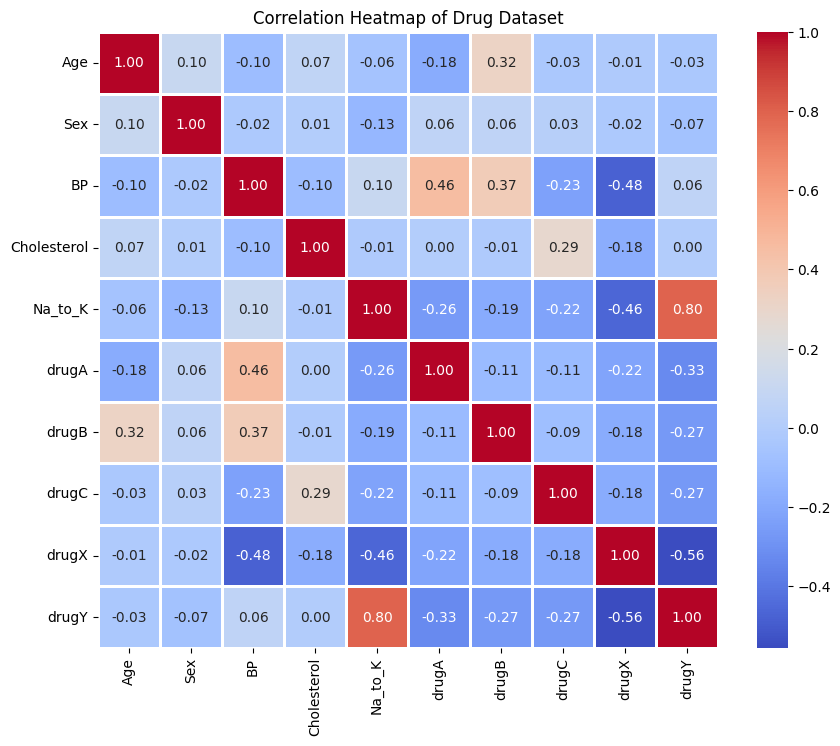

In [268]:
# Create a heatmap of the correlation matrix.
plt.figure(figsize=(10, 8))
sns.heatmap(drug_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.9)
plt.title('Correlation Heatmap of Drug Dataset')
plt.show()

In [269]:
# Our target variable Y are drug types.
y = drug_df[['drugA', 'drugB', 'drugC', 'drugX', 'drugY']]
# Our input features.
x = drug_df.drop(columns = y.columns)

In [270]:
# Split training & testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [271]:
# We don't know optimal parameters so we'll use None and prune later.
unpruned = DecisionTreeClassifier(max_depth=None, random_state=42)
unpruned.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [272]:
# Let's see how it performed unpruned.
print("Unpruned performance:", unpruned.score(x_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Unpruned performance: 0.9
At depth: 9


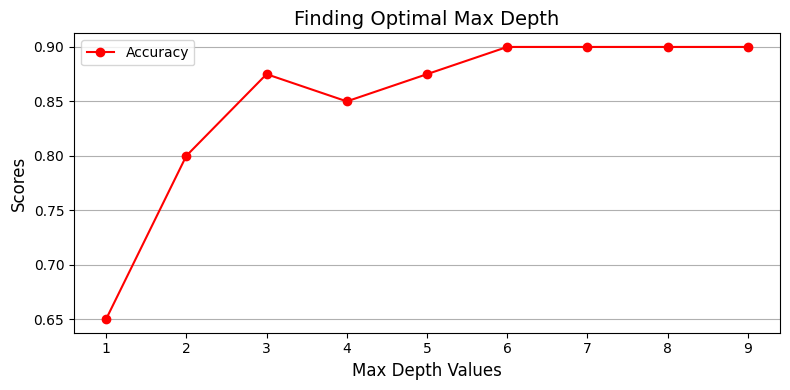

In [273]:
# We can visualise the score as the maximum depths change.
pruned_scores = []
depth_range = range(1,unpruned.tree_.max_depth+1)

for i in depth_range:
    clf = DecisionTreeClassifier(max_depth=i,random_state=42)
    clf.fit(x_train,y_train)
    pruned_scores.append(clf.score(x_test,y_test))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(depth_range, pruned_scores, marker = 'o', linestyle = '-', color = 'r', label = 'Accuracy')
ax.set_xlabel("Max Depth Values", fontsize = 12)
ax.set_ylabel("Scores", fontsize = 12)
ax.set_title("Finding Optimal Max Depth", fontsize = 14)
ax.xaxis.set_ticks(depth_range)
ax.yaxis.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [274]:
# Getting the optimal depth and using to train tree.
optimal_depth = depth_range[np.argmax(pruned_scores)]
print('Optimal performance at depth:', optimal_depth)

pruned_tree = DecisionTreeClassifier(max_depth = optimal_depth, random_state=42)
pruned_tree.fit(x_train, y_train)

Optimal performance at depth: 6


DecisionTreeClassifier(max_depth=6, random_state=42)

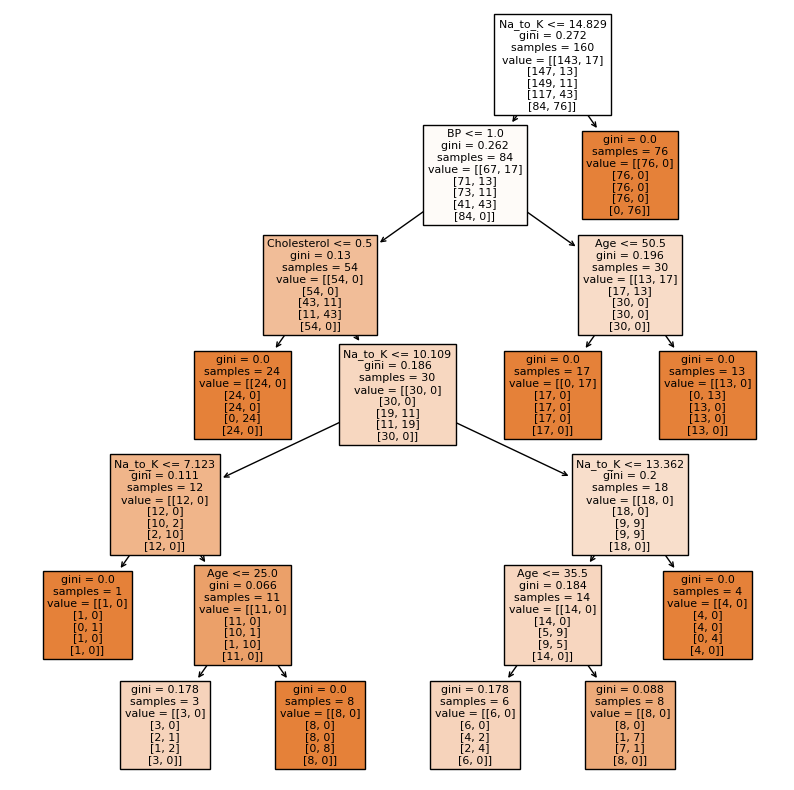

In [275]:
# Plot pruned tree.
fig = plt.figure(figsize=(10, 10))
_ = tree.plot_tree(pruned_tree, 
                    feature_names = drug_df.drop(columns=['drugA', 'drugB', 'drugC', 'drugX', 'drugY']).columns,  
                    filled = True)
plt.savefig('pruned_tree.png')

In [276]:
# Import the Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier

In [277]:
# Create and train the Random Forest model.
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

# Evaluate the Random Forest model.
print("Accuracy of Random Forest:", random_forest.score(x_test, y_test))

Accuracy of Random Forest: 0.85


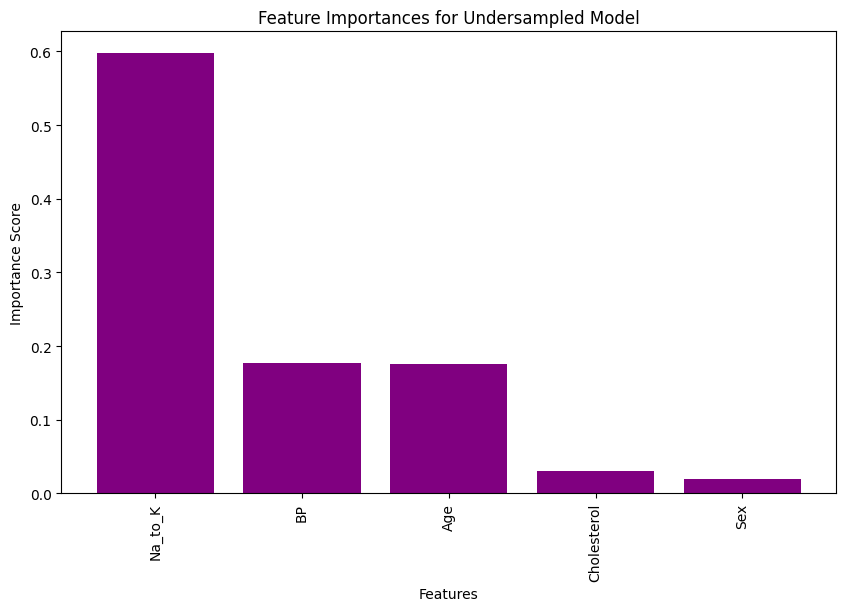

In [278]:
# The most important features in decending order.
importances = dict(zip(random_forest.feature_names_in_, random_forest.feature_importances_))
importances = {key: value for key, value in sorted(importances.items(), key = lambda sample: sample[1], reverse = True)}
importances

# Visualising the importances.
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances.values(), align='center', color='purple')
plt.xticks(range(len(importances)), importances.keys(), rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances for Undersampled Model')
plt.show()

In [279]:
# Import modules to help hyperparameter tuning.
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [280]:
# Define the ranges for our parameters.
param_def = {
    'n_estimators': randint(50, 500),
    'max_depth': [None] + list(randint(5, 50).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
}

In [281]:
# Find optimal parameters with ranges given.
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions = param_def,
    n_iter = 100,
    scoring='accuracy',
    cv=5,
    verbose=10,
    random_state=42,
    n_jobs=-1
)

In [282]:
# Let's fit our random search.
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 7, 37, 40, 14, 34,
                                                      7, 43, 26, 34, 33],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AB5979B050>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AB5B13A0D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AB596139D0>},
                   random_state=42, scoring='accuracy', verbose=10)

In [283]:
# The best model based on our random search.
best_model = random_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Best model found by the random search:",best_model)
print("Test accuracy:",test_accuracy)


Best model found by the random search: RandomForestClassifier(max_depth=37, max_features=None, min_samples_split=6,
                       n_estimators=280)
Test accuracy: 0.875


In [284]:
from sklearn.metrics import classification_report, accuracy_score

In [285]:
# Evaluate the best model on the test set.
test_predictions = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
# Test accuracy.
print("Test Accuracy:", test_accuracy)

# Classification report.
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))

Test Accuracy: 0.875

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         5
           3       0.69      1.00      0.81        11
           4       1.00      1.00      1.00        15

   micro avg       0.88      0.88      0.88        40
   macro avg       0.74      0.80      0.76        40
weighted avg       0.79      0.88      0.82        40
 samples avg       0.88      0.88      0.88        40



c:\Users\richi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\richi\AppData\Local\Temp\ipykernel_28320\3318584943.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_class_2[sorted_idx], y=x.columns[sorted_idx], palette='viridis')


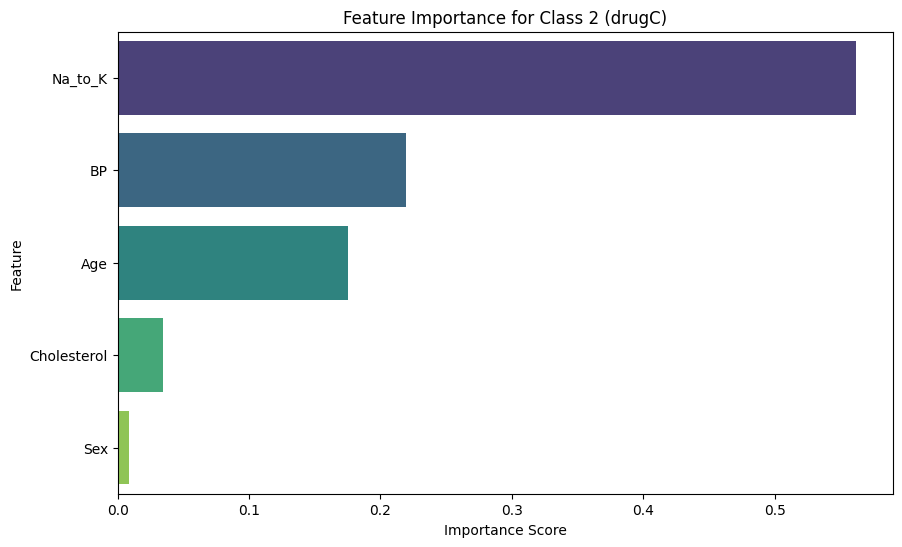

In [294]:
# Na_to_K plays a bigger role in determining if a sample belongs in class 2.
feature_importance_class_2 = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance_class_2)[::-1]

# Plot it's feature importances.
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_class_2[sorted_idx], y=x.columns[sorted_idx], palette='viridis')
plt.title('Feature Importance for Class 2 (drugC)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [295]:
# Check Class Imbalance for class 2.
class_2_percentage = (drug_df['drugC'].sum() / len(drug_df)) * 100
print(f"{class_2_percentage}% of class 2 instances in dataset")

8.0% of class 2 instances in dataset


: 

In [288]:
# Since there seems to be an imbalance, we can try over or under sampling.
# You could also try adjusting class weights but it decreased score. 
from imblearn.over_sampling import SMOTE

# Convert DataFrame to NumPy arrays.
x_train_array = x_train.to_numpy()
y_train_array = y_train.to_numpy()

# Apply SMOTE to oversample the class.
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_array, y_train_array)

# Create new forset with oversampled class.
oversampled_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data.
oversampled_model.fit(x_train_resampled, y_train_resampled)

# Evaluate the model on the test set.
test_accuracy_oversampled = oversampled_model.score(x_test, y_test)
print("Test Accuracy with Oversampling:", test_accuracy_oversampled)

Test Accuracy with Oversampling: 0.9


c:\Users\richi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [289]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the test set.
y_pred_oversampled = oversampled_model.predict(x_test)

# Classification report for oversampled model.
print("Classification Report for Oversampled Model:")
print(classification_report(y_test, y_pred_oversampled))

# ROC AUC score for oversampled model.
roc_auc_oversampled = roc_auc_score(y_test, y_pred_oversampled)
print("ROC AUC Score for Oversampled Model:", roc_auc_oversampled)


Classification Report for Oversampled Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       0.67      0.40      0.50         5
           3       0.77      0.91      0.83        11
           4       1.00      1.00      1.00        15

   micro avg       0.90      0.90      0.90        40
   macro avg       0.89      0.86      0.87        40
weighted avg       0.89      0.90      0.89        40
 samples avg       0.90      0.90      0.90        40

ROC AUC Score for Oversampled Model: 0.9177071204657411


c:\Users\richi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [290]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample majority class.
undersampler = RandomUnderSampler(random_state=42)
x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train_array, y_train_array)

# Create new forset with undersampled class.
undersampled_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data.
undersampled_model.fit(x_train_resampled, y_train_resampled)

# Evaluate the model on the test set.
test_accuracy_undersampled = undersampled_model.score(x_test, y_test)
print("Test Accuracy with Undersampling:", test_accuracy_undersampled)

Test Accuracy with Undersampling: 0.9


c:\Users\richi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [291]:
# Make predictions on the test set.
y_pred_undersampled = undersampled_model.predict(x_test)

# Classification report for undersampled model.
print("Classification Report for Undersampled Model:")
print(classification_report(y_test, y_pred_undersampled))

# ROC AUC score for undersampled model.
roc_auc_undersampled = roc_auc_score(y_test, y_pred_undersampled)
print("ROC AUC Score for Undersampled Model:", roc_auc_undersampled)

# Undersampling seems to perform slightly better than oversampling.
# Better predictions for class 2.
# Higher class seperation.

Classification Report for Undersampled Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       0.75      0.60      0.67         5
           3       0.91      0.91      0.91        11
           4       1.00      0.93      0.97        15

   micro avg       0.95      0.90      0.92        40
   macro avg       0.93      0.89      0.91        40
weighted avg       0.94      0.90      0.92        40
 samples avg       0.90      0.90      0.90        40

ROC AUC Score for Undersampled Model: 0.9379370055232125


c:\Users\richi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\richi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


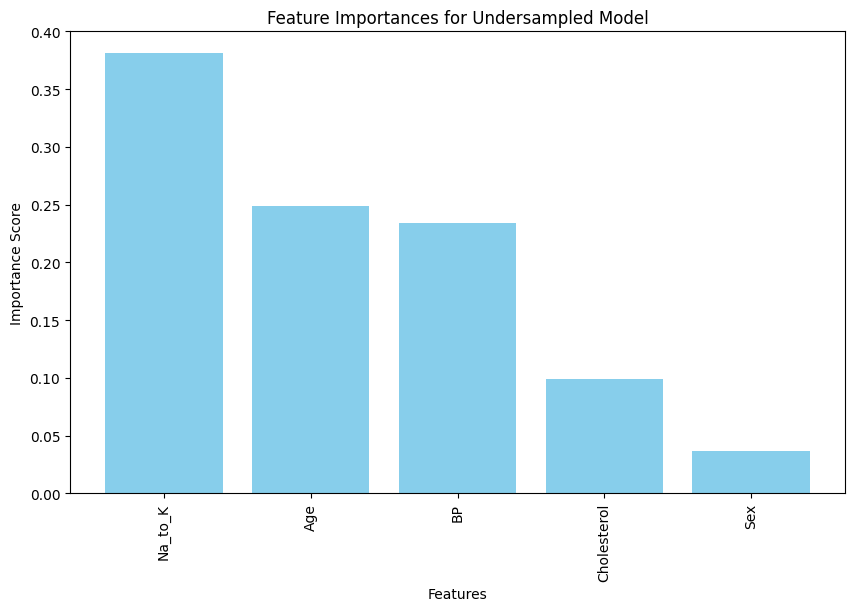

In [292]:
# We can now see that Age is more important, it plays higher role in the models predictions.
# Na_to_K is less dominant.
# Dictionary for feature importances with undersampled model.
undersample_importances = dict(zip(x_train.columns, undersampled_model.feature_importances_))
undersample_importances = {key: value for key, value in sorted(undersample_importances.items(), key=lambda item: item[1], reverse=True)}

# Visualising the importances.
plt.figure(figsize=(10, 6))
plt.bar(range(len(undersample_importances)), undersample_importances.values(), align='center', color='skyblue')
plt.xticks(range(len(undersample_importances)), undersample_importances.keys(), rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances for Undersampled Model')
plt.show()

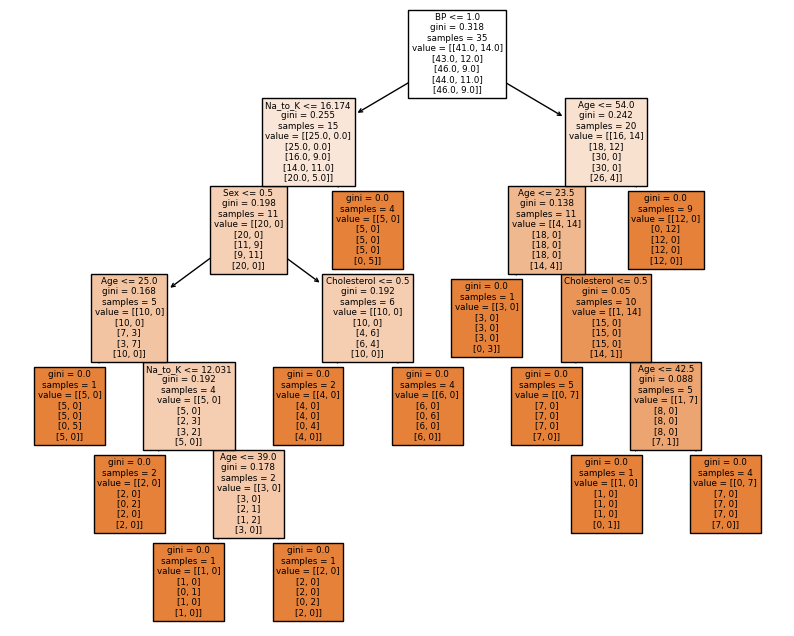

In [293]:
# One tree from forest
random_tree = undersampled_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(10, 8))
tree.plot_tree(random_tree, feature_names = x_train.columns, class_names=undersampled_model.classes_, filled=True)
plt.show()